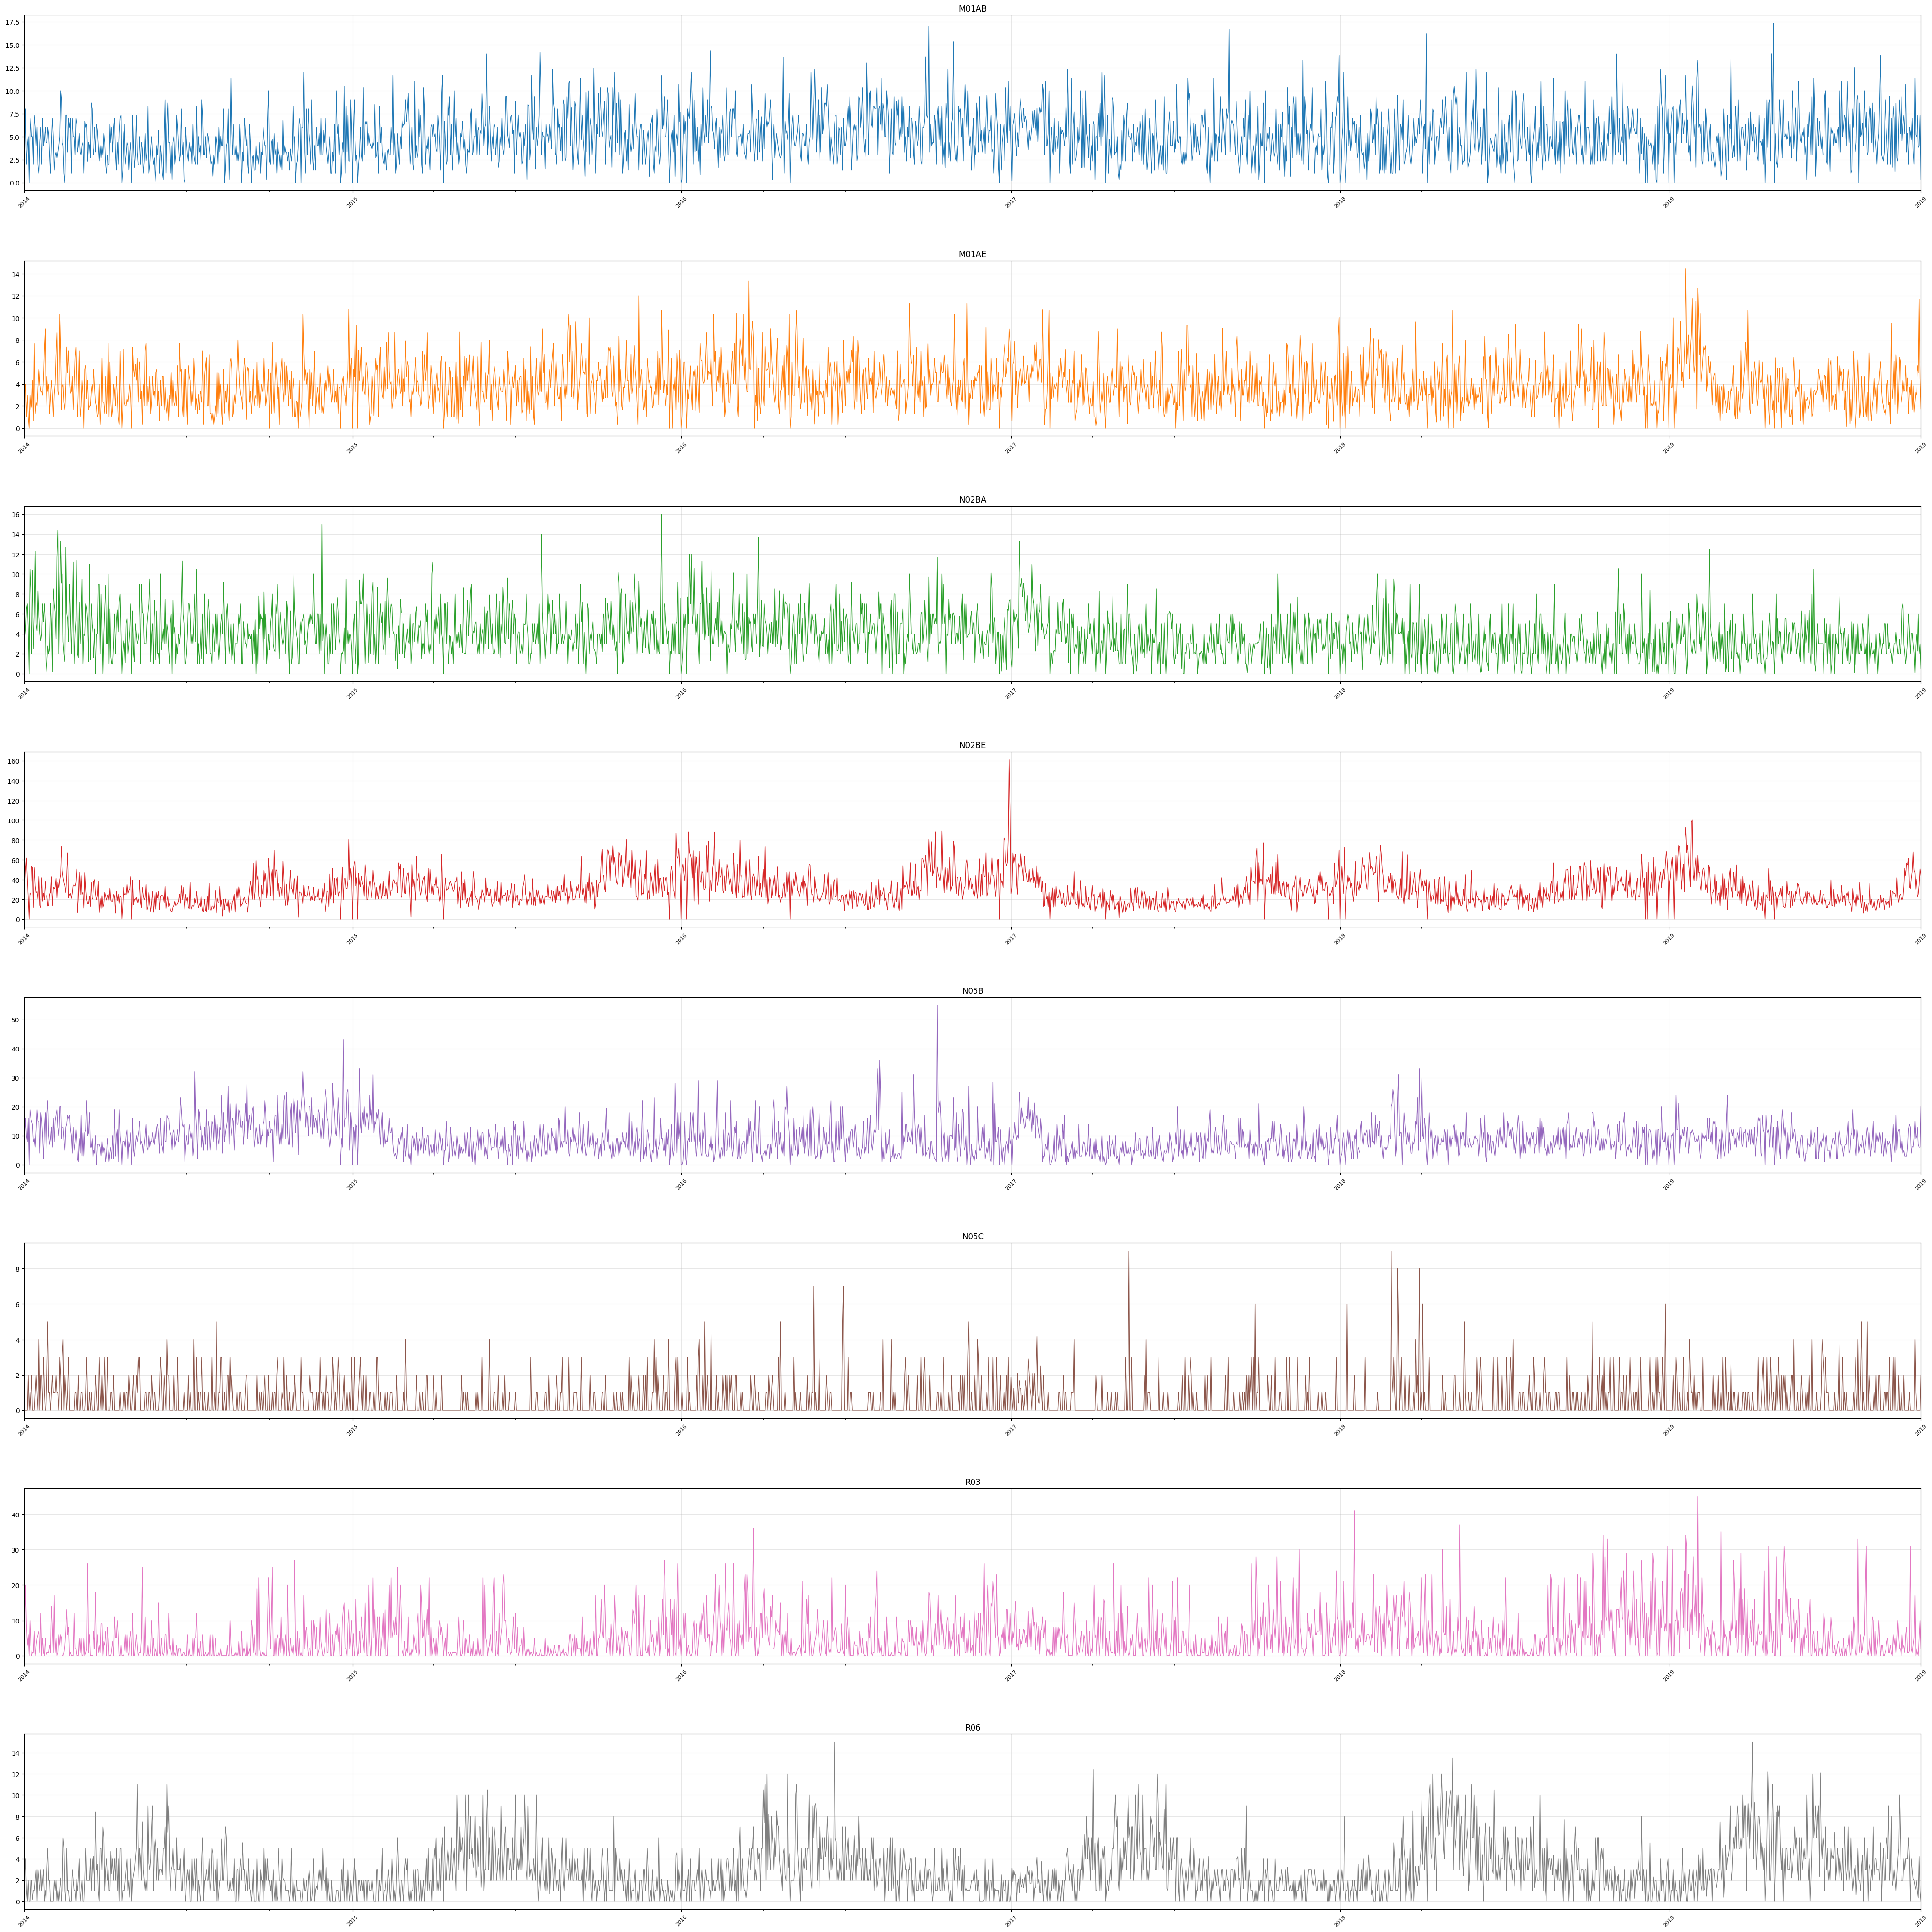

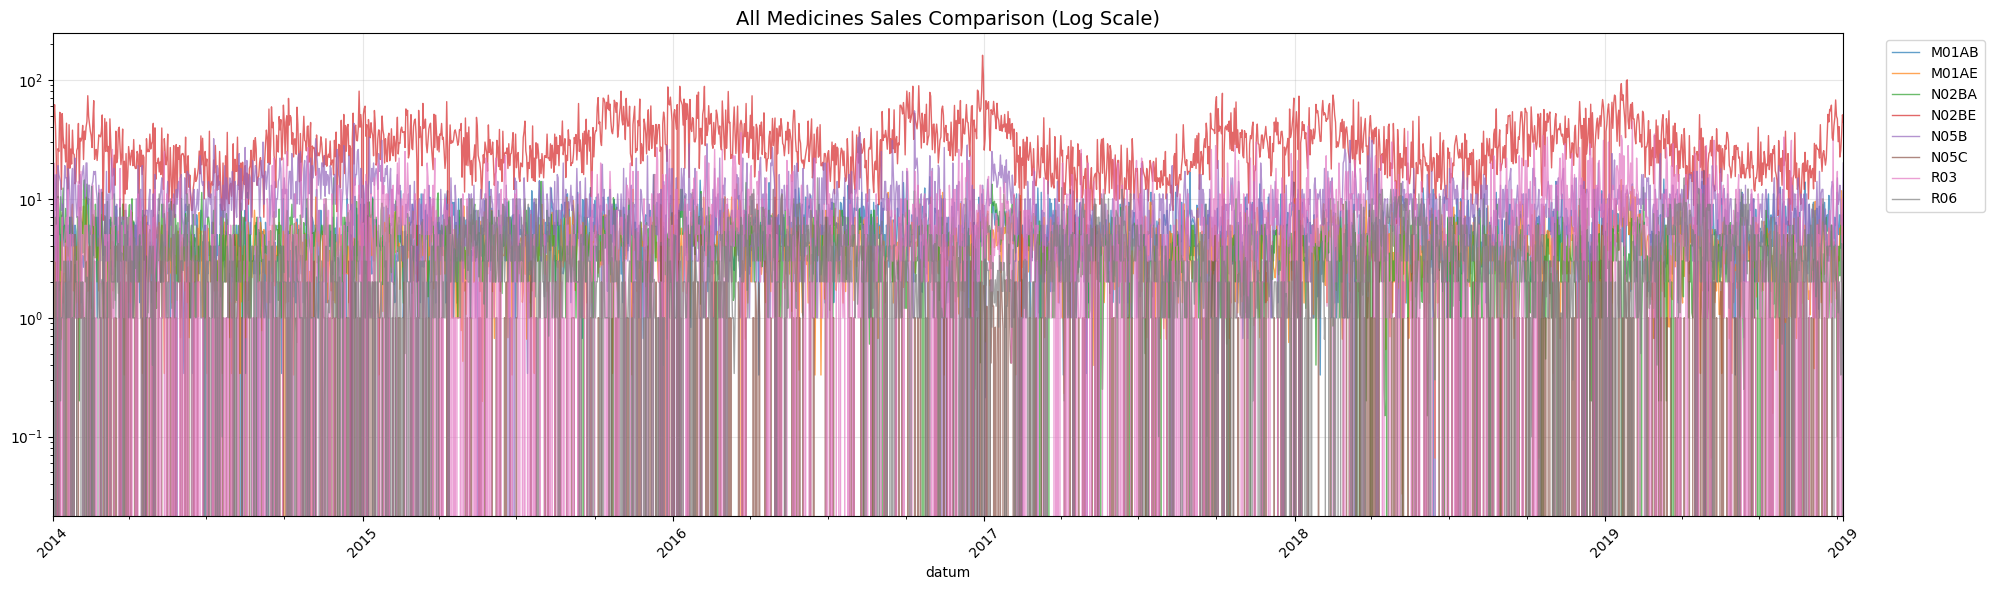

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read data
df = pd.read_csv('salesdaily.csv', parse_dates=['datum'])
medicines = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Configuration options (choose one)
layout_mode = "wide"  # Options: "wide" (1x8), "balanced" (2x4), "vertical" (4x2)

# Set layout parameters
if layout_mode == "wide":
    nrows, ncols, figsize = 8, 1, (40, 40)
elif layout_mode == "balanced":
    nrows, ncols, figsize = 2, 4, (24, 10)
else:  # vertical
    nrows, ncols, figsize = 4, 2, (12, 16)

# Create individual trend plots
fig1, axes = plt.subplots(nrows, ncols, figsize=figsize)
axes = axes.flatten()  # Flatten for easy iteration

for i, (med, ax) in enumerate(zip(medicines, axes)):
    df.plot(
        x='datum',
        y=med,
        ax=ax,
        linewidth=1,
        color=f'C{i}',
        legend=False
    )
    ax.set_title(med, fontsize=12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(alpha=0.3)
    ax.set_xlabel('')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Create comparison plot in separate figure
fig2 = plt.figure(figsize=(20, 6))
ax = fig2.add_subplot(111)

for i, med in enumerate(medicines):
    df.plot(
        x='datum',
        y=med,
        ax=ax,
        linewidth=1,
        alpha=0.7,
        label=med,
        color=f'C{i}'
    )

ax.set_title('All Medicines Sales Comparison (Log Scale)', fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()